In [1]:
import sys
!{sys.executable} -m pip install numpy
import sys
!{sys.executable} -m pip install pandas
import sys
!{sys.executable} -m pip install pandas_datareader
import sys
!{sys.executable} -m pip install matplotlib
import sys
!{sys.executable} -m pip install scipy
import sys
!{sys.executable} -m pip install statsmodels
import sys
!{sys.executable} -m pip install stats

import numpy as np 
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import math

DAX = web.DataReader(name = '^GDAXI', data_source = 'yahoo', start = '2017-1-1', end = '2017-12-31')

In [4]:
import numpy as np 
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import math
import stats
import scipy 

In [3]:
DAX.head() #le début du tableau 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,11617.280273,11414.820312,11426.379883,11598.330078,47456100.0,11598.330078
2017-01-03,11637.370117,11561.230469,11631.700195,11584.240234,88413500.0,11584.240234
2017-01-04,11616.089844,11531.429688,11609.530273,11584.309570,82173600.0,11584.309570
2017-01-05,11602.540039,11537.400391,11537.730469,11584.940430,74924900.0,11584.940430
2017-01-06,11605.740234,11547.049805,11560.519531,11599.009766,67084900.0,11599.009766


In [6]:
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2017-01-02 to 2017-12-29
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


C:\Users\nourg\Downloads\Algo1\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


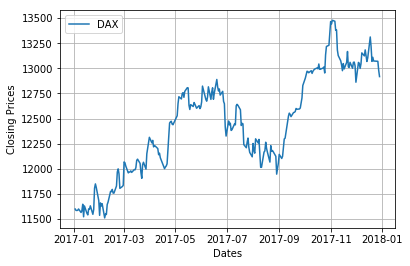

In [7]:
#question1

plt.plot(DAX['Close'])
plt.legend(['DAX'],loc=2)
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.show()

In [8]:
#question2

DAX['Return']=DAX['Close']/DAX['Close'].shift() - 1 #shift valeur prec
# DAX['Return']=DAX['Close'].pct_change()

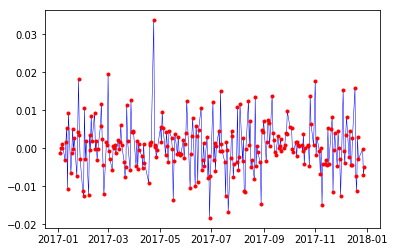

In [16]:
plt.plot(DAX['Return'],'b',lw=0.5)
plt.plot(DAX['Return'],'r.',lw=0.5)

In [17]:
#question 3
import scipy.stats 


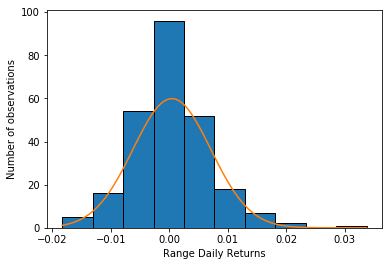

In [82]:
#delete first row

Return = DAX['Return'][1:n]


#compute normal curve parameters
meanR=np.mean(Return)
sdevR=np.std(Return)

#Prepare graph 
minR=np.min(Return)
maxR=np.max(Return)
x=np.linspace(minR,maxR,100)

#graph 
plt.hist(Return,edgecolor='black',bins=10)
plt.plot(x,scipy.stats.norm.pdf(x,meanR,sdevR))
plt.xlabel('Range Daily Returns')
plt.ylabel('Number of observations')
plt.show()

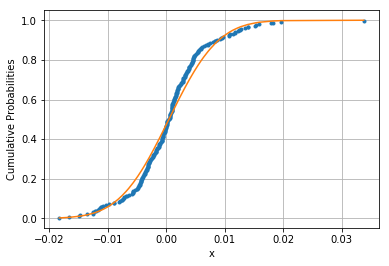

In [20]:
#question 4

from scipy.stats import norm
x=np.sort(Return) #Return a sorted copy of an array.
y=np.arange(1,len(x)+1)/float(len(x)) #générer une liste de nombre de 1 à len(x)+1 
#Return evenly spaced values within a given interval.
meanR=np.mean(Return) #Compute the arithmetic mean along the specified axis.
sdevR=np.std(Return) #Compute the standard deviation along the specified axis.
y1=norm.cdf((x-meanR)/sdevR)

plt.plot(x,y,marker='.',linestyle='none')
plt.plot(x,y1)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('Cumulative Probabilities')
plt.show()

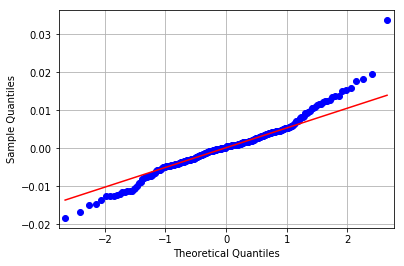

In [83]:
#question 5 

#Q-Q plot 

import statsmodels.api as sm

sm.qqplot(Return,line='s')
py.grid(True)
py.show()

In [79]:
# Question 6 : Test the normality hypothesis with the Jarque Bera test.

from scipy import stats 
Return = DAX['Return'][1:n]
print("stats returns:", stats.describe(Return))


stats returns: DescribeResult(nobs=251, minmax=(-0.01827106641410059, 0.03373098597668167), mean=0.000451424924937419, variance=4.453973583065822e-05, skewness=0.5546012346505382, kurtosis=2.5361811967702383)


In [80]:
#Statistiques descriptives

statdes = stats.describe(Return)
minmaxR = statdes[1]
meanR = statdes[2]
varR = statdes[3]
skewnessR = statdes[4]
excesskurtosisR = statdes[5]
kurtosisR = excesskurtosisR + 3

print(minmaxR)
type(minmaxR)


(-0.01827106641410059, 0.03373098597668167)


tuple

In [84]:
minR=minmaxR[0]
maxR=minmaxR[1]

print(minR,maxR)

-0.01827106641410059 0.03373098597668167


In [85]:
# calcul de la statistique de BJ

n=len(Return)
print(n)
BJ = (n/6)*(skewnessR**2)+(n/24)*(excesskurtosisR**2)
chi2quantile = stats.chi2.pdf(0.95,df=2)

251


In [86]:
print("BJ = ", BJ)
print("Chi2_quantile =", chi2quantile)
if(BJ>chi2quantile):
    print("The Bera-Jarque test rejects at confidence level 5% the normality hypotesis")
else:
    print("The Bera-Jarque test does not reject at confidence level 5% the normality hypotesis")

BJ =  80.13745168205773
Chi2_quantile = 0.31094252823251006
The Bera-Jarque test rejects at confidence level 5% the normality hypotesis


In [94]:
#question 7 



CAC = web.DataReader(name = '^FCHI', data_source = 'yahoo', start = '2017-1-1', end = '2017-12-31')
CAC.head()

Tickers = [DAX,CAC]

P=pd.DataFrame()

P[1]=DAX['Close']
P[2]=CAC['Close']


P.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2017-01-02 to 2017-12-29
Data columns (total 2 columns):
1    252 non-null float64
2    252 non-null float64
dtypes: float64(2)
memory usage: 5.9 KB


In [106]:
R = pd.DataFrame()
R[1]=P[1]/P[1].shift() - 1
R[2]=P[2]/P[2].shift() - 1
R=R[1:]
R.head()

,1,2
Date,,
2017-01-03,-0.001215,0.003472
2017-01-04,0.000006,0.000014
2017-01-05,0.000054,0.000253
2017-01-06,0.001214,0.001877
2017-01-09,-0.003019,-0.004536


In [99]:
weights = np.array([0.2,0.8])

In [109]:
ptf_return = R.dot(weights)

In [110]:
ptf_return.head()

Date
2017-01-03    0.002534
2017-01-04    0.000013
2017-01-05    0.000213
2017-01-06    0.001745
2017-01-09   -0.004232
dtype: float64

In [111]:
mean = np.mean(ptf_return)
print(mean)

0.00037731248398031116


In [112]:
var = np.std(ptf_return)**2
print(var)

4.281482370943203e-05
